# Housing Price Prediction — Ames Housing Dataset
# Author: Anthony
# Date: 2025-11-29
# Description: Exploring which features mostly influence housing prices using linear regression and random forests.


## Introduction

The real estate market appears to be straightforward: if you own a larger house, you pay more money for it. However, if you examine the actual data available for analysis, matters become more complicated. The Ames Housing Data set offers us an opportunity to explore just how complicated that market can be. There’s much more to every individual property than just those factors: types of materials, age, neighborhood quality factors, renovation status, lot shape, and so on.

This project explores which characteristics genuinely shape housing prices in Ames, Iowa. i'll utilize two models for this purpose. First, i'll employ a linear regression model to identify how features correlate with housing prices directly. Second, i'll apply a random forest model to identify actual patterns hidden within real estate data.

The objective goes beyond just making price predictions. It’s more about grasping market structure: which features determine value all the time, which features determine value only when combined with others in specific ways, and how differently various modeling decisions impact an interpretation of value. By the conclusion of this project, it will be apparent which features provide actual value and how well more complex models predict compared to basic models.

## Imports and Basic Setup

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
sns.set(style="whitegrid")


## Load the Ames Housing Dataset

In [2]:
from sklearn.datasets import fetch_openml

housing = fetch_openml("house_prices", as_frame=True)
df = housing.frame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Inspect the Shape and Basic Info

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


## Data Overview

The Ames Housing dataset is essentially a detailed census of residential properties sold in Ames, Iowa. It has 1460 entries and about 80 features; every single one of these features reveals either the physical characteristics of the property or the environment in which it was located or perhaps was related to at least one aspect of the sale itself. The Ames Housing dataset excels at providing diverse characteristics which could range from objective ones like number of floors or year built to subjective ones like LSF scores or neighborhood types.

Looking through the first few rows feels a bit like scanning a set of architectural blueprints. You find straightforward entries such as lot size and living areas interspersed with more unusual entries concerning basement features, garage completion status, masonry veneer condition, or electriﬁcation system status. There’s obviously everything but the kitchen sink included somewhere among these entries; it’s not just numbers—you have to create the model from this diverse set of features.

A casual inspection of the columns reveals that there exist numerous columns with missing entries because not every house has every feature. It would only make sense that a home without a pool would create missing entries within columns pertaining to pools. There exist columns that contain numbers but seem more like ordered factors; quality scores would be at the top of this list. These columns must be carefully considered when approaching.

Prior to constructing models, this phase of the project has only one major purpose: to get to know the terrain. Understanding the kinds of variables you’re working with, where your missing data is located and how much of it there is, and just how your dataset looks gives you guidance on how your eventual cleaning and model-building processes will go. It takes your data from being just a large table to something more like terrain with different areas with unusual pockets and patterns just waiting to be discovered.

## Cleaning & Preprocessing

The Ames dataset is generous in size but messy around the edges. Many houses lack certain features and their corresponding columns naturally contain missing values. Other columns are sparse or redundant. This step smooths the dataset into a form suitable for modeling without overengineering it.

### 1. Check Missing Values

In [6]:
print(df.isnull().sum().sort_values(ascending=False).head(20).to_string())

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageQual        81
GarageYrBlt       81
GarageType        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Condition2         0


The way we fix missing values depends on our use case. Sometimes, the value is missing because there’s no record – that’s the case in this dataset. We can use different ways to replace the missing values; the one we choose will depend on what we want to do with the data.

In the case of a machine learning application, replacing missing values with the mean or any other relevant values could be a better solution as it would avoid creating a bias and maintain the predictive power of the feature.

So, we'll drop columns with high missing values and fill the remaning columns with missing values with their means or medians.

### 2. Drop High-Missing Columns
We'll drop columns with more than 40% missing values. This keeps the project focused and avoids noisy imputations.

In [7]:
missing_percent = df.isnull().mean()
high_missing = missing_percent[missing_percent > 0.4].index
print(f"The columns with greater than 40% missing values are: \n {high_missing}")

The columns with greater than 40% missing values are: 
 Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [8]:
df = df.drop(columns = high_missing)
df.shape

(1460, 76)

5 high missing columns have now been dropped

### 3. Drop ID column

In [9]:
df = df.drop(columns ="Id")
df.shape

(1460, 75)

### 4. Separate Numerical and Categorical Columns
Knowing these groups helps us impute properly and encode later

In [10]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns
print(num_cols)
print(cat_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Ce

### 5. Impute Missing Values
Numerical: fill with median

Categorical: fill with “None”

In [11]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna("None")
df.isnull().sum().sort_values(ascending=False).head(20)

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
dtype: int64

There are no more missing values

### 6. Encode Categorical Variables
Random forests accept only numbers, so one-hot encoding is the way to go.

In [12]:
df.shape

(1460, 75)

In [13]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.shape

(1460, 243)

After one-hot encoding, we have 244 columns

### 7. Define Features and Target

In [14]:
X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

## Exploratory plots

Now that the dataset is cleaned, the natural question becomes: What does price actually look like across this landscape of houses? Plots let us watch as patterns emerge.

### 1. Distribution of Sale Prices

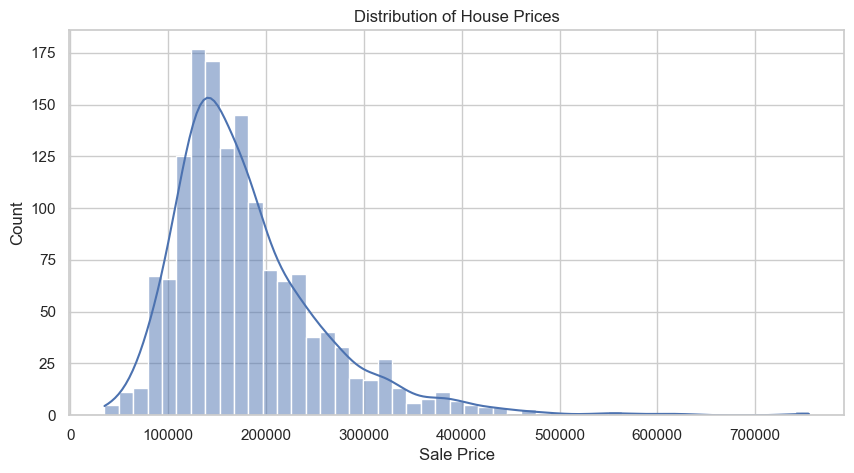

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()

This plot combines a histogram with a kernel density estimate, providing a smooth representation of the distribution.

This plot reveals a right-skewed curve. We see that expensive houses form a long tail. It hints that transformations or nonlinear models might understand the data better than a plain linear model.

### 2. Relationship Between Ground Living Area and Price

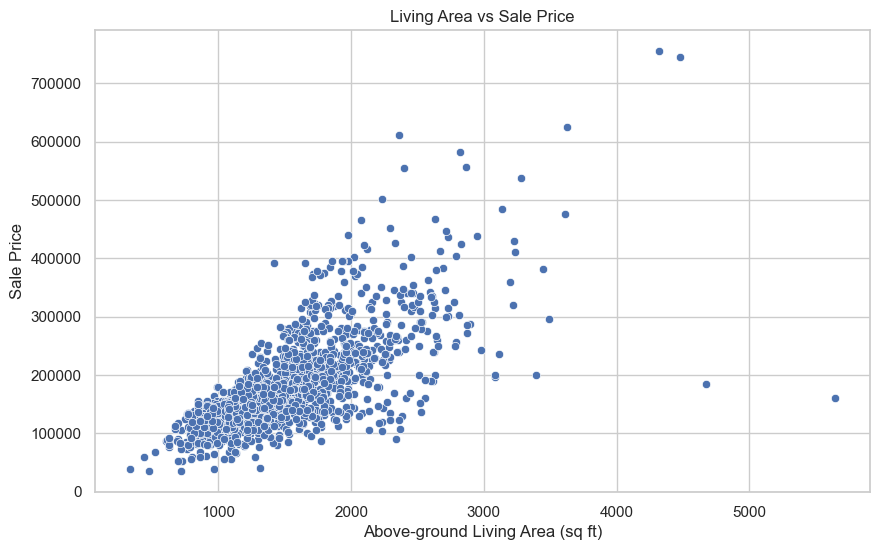

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])
plt.title("Living Area vs Sale Price")
plt.xlabel("Above-ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()

This visualization shows that the price increases with ground living area.
We see a gentle rising cloud of points — bigger homes, higher prices — but also the occasional outlier mansion that breaks the line. These outliers could be important later when comparing model performance.

### 3. Boxplot of Price by Overall Quality
A good way of representing categorical data is through a box plot.

Here, we’ll plot overall quality data against the sale price to see if we can identify a correlation or a pattern.

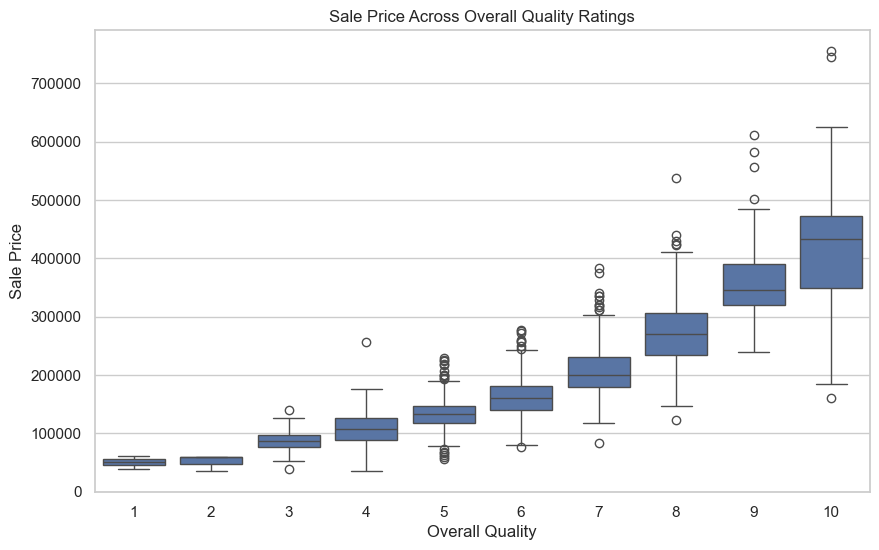

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["OverallQual"], y=df["SalePrice"], data=df)
plt.title("Sale Price Across Overall Quality Ratings")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

This plot shows a beautiful staircase effect where each quality level pushes the price up sharply.

### 4. Correlation Heatmap (for numerical variables)


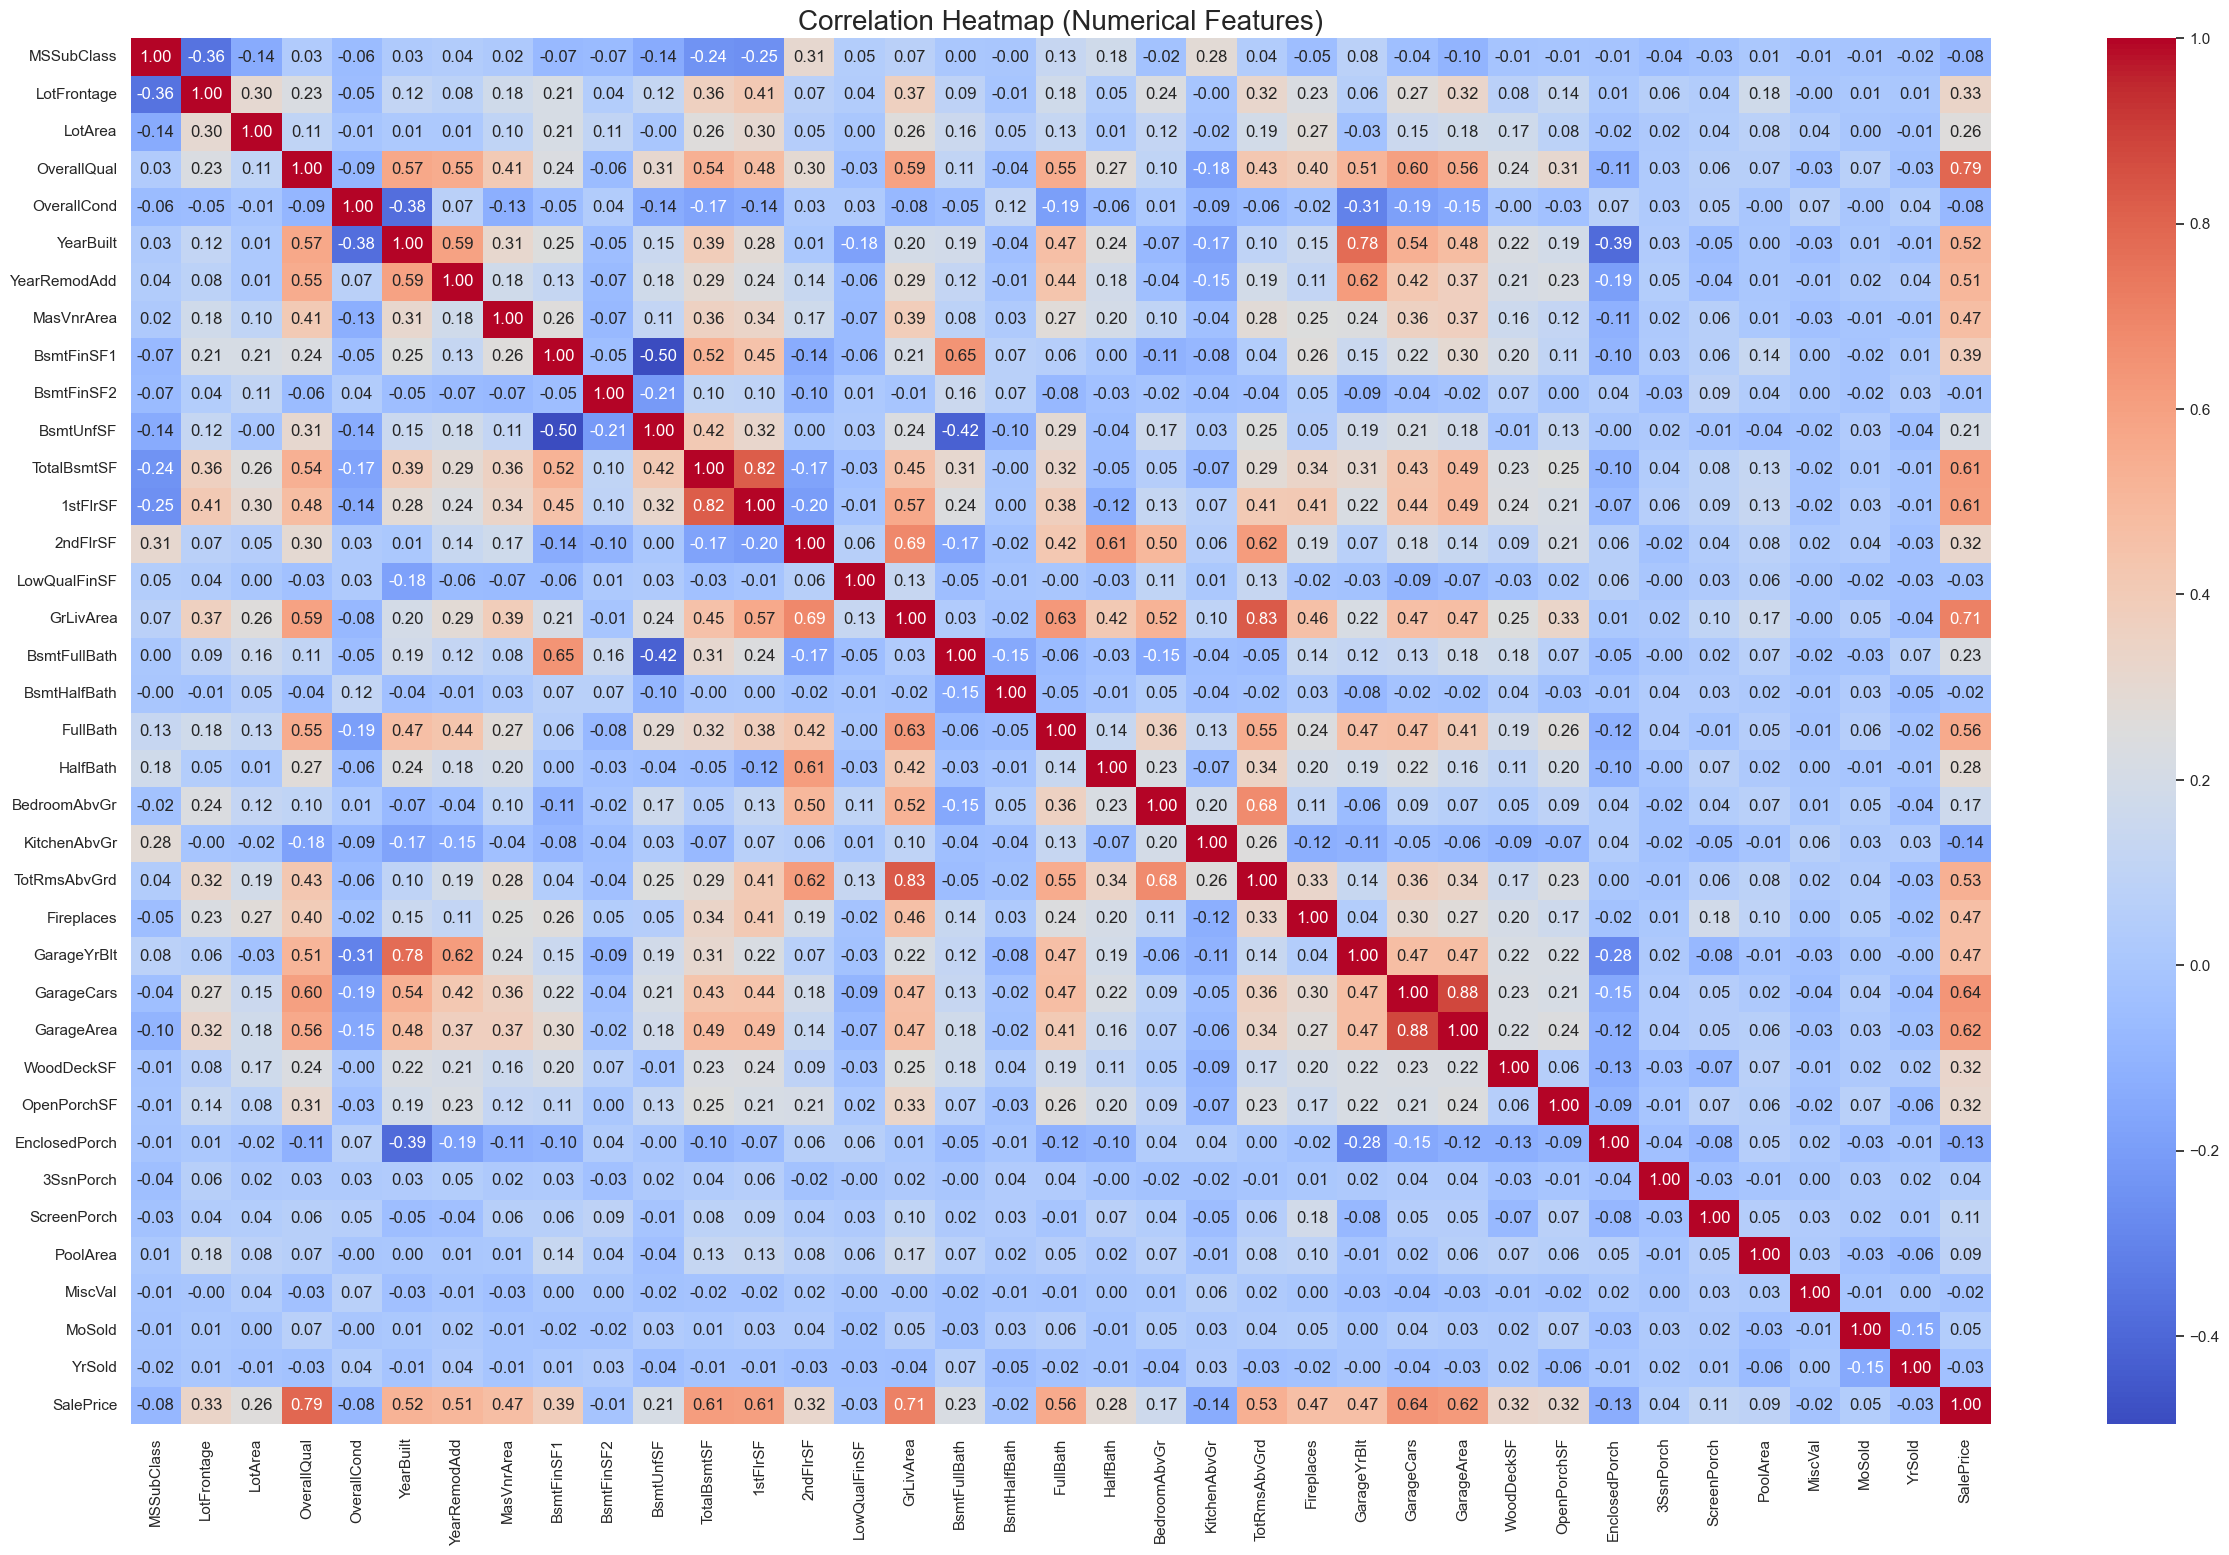

In [56]:
plt.figure(figsize=(30,18))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Correlation Heatmap (Numerical Features)", fontsize= 20)
plt.show()

We can spot some strong linear relationships in areas which glow brightest.

### 5. Price vs Neighborhood (a categorical giant)

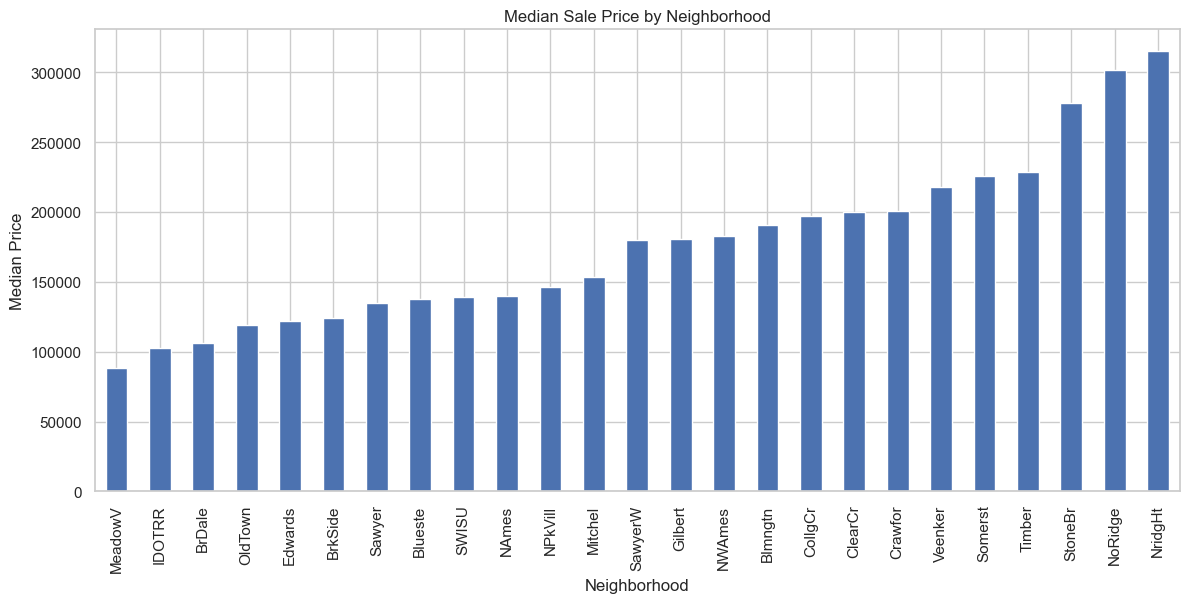

In [19]:
plt.figure(figsize=(14,6))
df.groupby("Neighborhood")["SalePrice"].median().sort_values().plot(kind='bar')
plt.title("Median Sale Price by Neighborhood")
plt.ylabel("Median Price")
plt.xticks(rotation=90)
plt.show()

Neighborhood behaves like a story inside a story. They are often one of the strongest drivers of price. This plot shows the class structure inside the city: some neighborhoods consistently outperform others.

## Baseline Model — Linear Regression

Linear regression draws the straightest possible line through your data. The point here isn’t perfection. It’s contrast.

### 1. Train–Test Split
We'll train the model with 80% of our dataset and test with 20%.

For the random state, using a fixed number like 10 ensures the same pseudo-random numbers are generated each time the code runs, which is useful for debugging and comparing model performance.

In [31]:
# We have features and target initially
X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

# Spliting our data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

We now have clean separation between what the model learns and what it must predict blind.

### 2. Fit the Linear Regression Model
We'll fit the linear regression model to identify the relationship between variables, predict future outcomes, and summarize data with a simple equation. Basically, it allows us to quantify how changes in our predictor variables are associated with changes in our response variable.

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## 3. Predict on the Test Set

In [22]:
y_pred_lr = lin_reg.predict(X_test)

### 4. Evaluate the Model
We'll use the mean squared error and R2 score to evaluate our model

In [23]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MSE: {mse_lr}, R2 Score: {r2_lr}")

MSE: 4111830779.7249146, R2 Score: 0.3572228087337046


The R2 tells us that the linear regression is only capturing about a third of the variance in SalePrice. That means the relationship between features and prices is highly nonlinear. The dataset has interactions that a straight-line model can’t bend itself around.

The MSE tells us that on average, the model’s predictions deviate by a wide margin when squared. 

Lets try to get the RMSE, which is basically “average prediction error in dollars".

In [34]:
rmse_lr = np.sqrt(mse_lr)
print(f"Root mean squared error: ${RMSE}")

Root mean squared error: $64123.55869510764


The model is typically off by around $64k.

## Decision Tree Regressor

A Decision Tree Regressor is a supervised machine learning algorithm used for predicting continuous numerical values. A single tree is flexible. It can split the housing landscape into small regions where prices behave more consistently. 

Here, the model stops pretending the world is linear and starts making conditional decisions. For example: “If the quality is high AND the living area is large, then raise the price prediction.”

### 1. Train the Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(
    max_depth=10, # prevents the tree from memorizing the dataset
    min_samples_leaf=5, # ensures each leaf has a meaningful nmber of observations
    random_state=42
)

tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=42)

The max_depth and min_samples_leaf are really important.
Without them, the tree memorizes every training example and then panics when facing new data.

### 2. Predict on the Test Set

In [26]:
y_pred_tree = tree.predict(X_test)

### 3. Evaluate the Tree

In [38]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree) 

print(f"MSE: {mse_tree}, R2 Score: {r2_tree}, RMSE: {rmse_tree}")

MSE: 1455267007.7878444, R2 Score: 0.7725070680386908, RMSE: 38147.96203977146


**Comparing the numbers:**

Linear Regression R²: ≈ 0.36

Decision Tree R²: ≈ 0.77

This proves two things:
1. House prices absolutely refuse to be linear
2. Nonlinear models capture the dataset's real structure

An R² of 0.77 for a single decision tree is a strong signal that the underlying relationships in the housing data are nonlinear and full of conditional logic.

### 4. Feature Importance Plot
This plot shows which variables the model leans on when making price decisions.

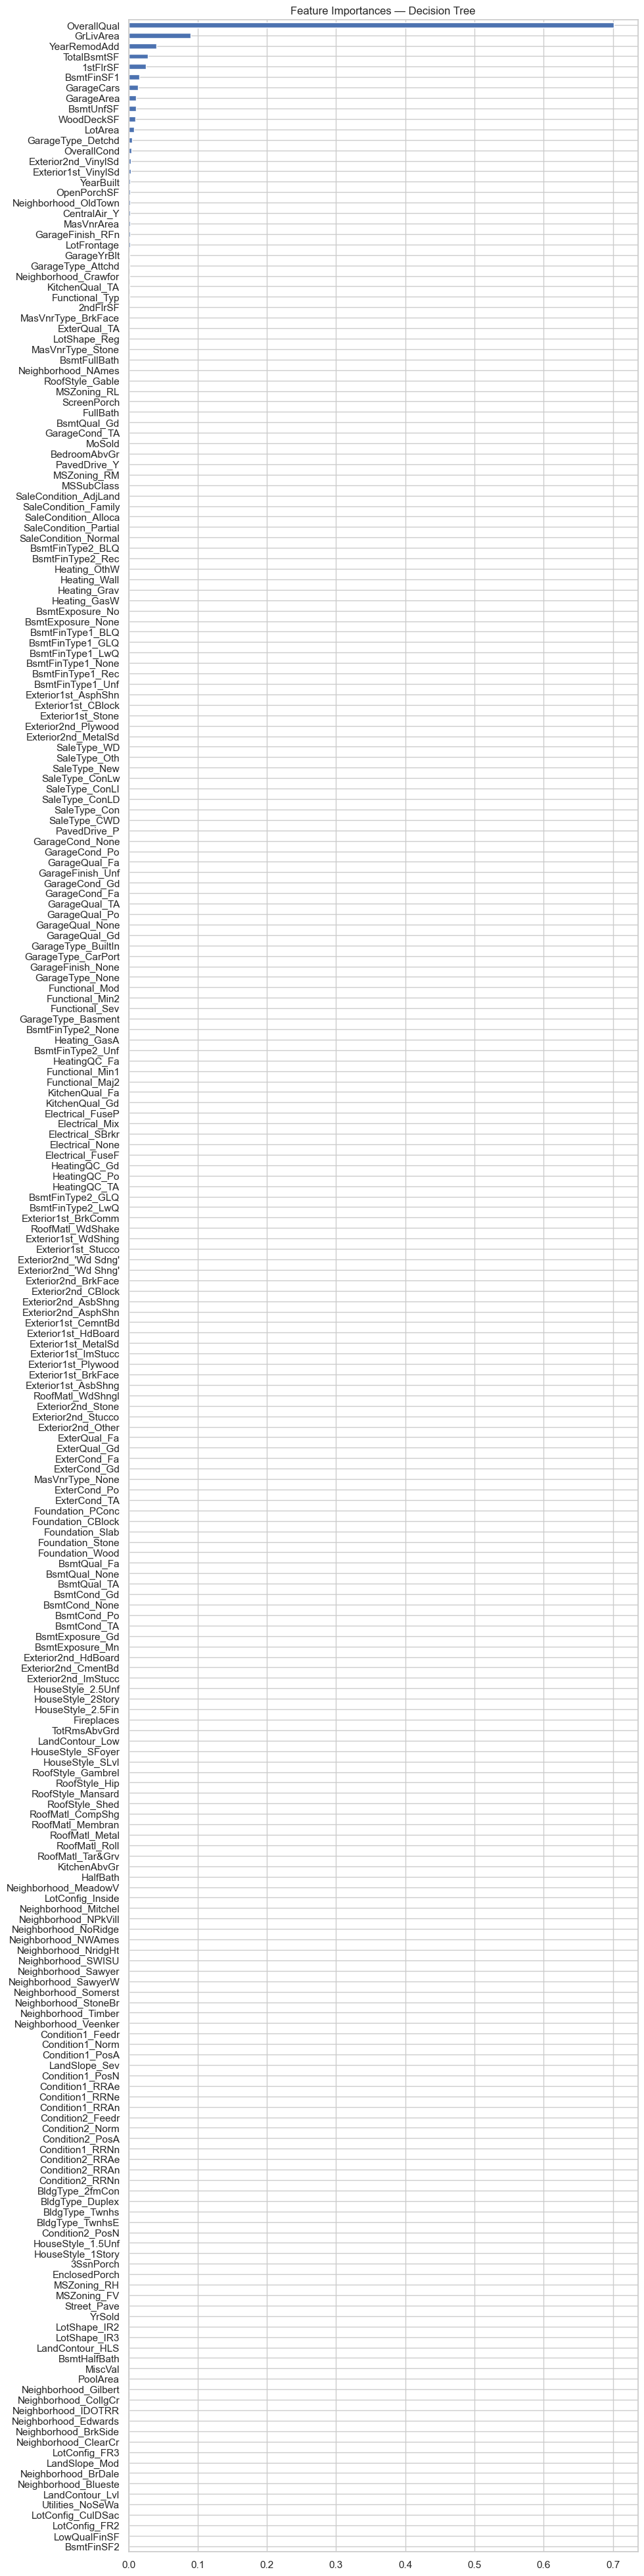

In [57]:
importances = pd.Series(tree.feature_importances_, index=X.columns)
important = importances.sort_values(ascending=False)
important.sort_values().plot(kind="barh", figsize=(10,50))
plt.title("Feature Importances — Decision Tree")
plt.show()

The model is essentially telling us who the main characters are in the housing drama. 

We see
- OverallQual glowing at the top
- GrLivArea not far behind
- Remodel date 
- basement, garage, and total area metrics contributing

### 5. Model Reflection: : From Linear Assumptions to Tree-Based Insight
Moving from linear models to decision trees helped me better understand the nature of the dataset. My linear regression model was inclined towards a straight-line relationship between the variables, which presented itself as a weakness of the model as it was not able to deal well with the erratic nature of the dataset.

Using a decision tree as a method of comparison highlighted the extent to which the linear model was lacking structure. By being able to divide the data into sensible spaces with only one decision tree, the non-linear relationships, which were being modeled as a linear relationship, were clearly more complex.

This transition helped increase my knowledge of the dataset. It helped realize that model selection is more than determining accuracy, that we choose a method that fits the real form of the data. Recording this transition shows that there is reasoning involved in the analysis, that the process goes through methodically.

### 6. Performance Comparison: Quantifying the Improvement

To better explain the contrast between the two models, I tested them with the same sets of metrics. The linear regression baseline model achieved an MSE of **4,111,830,779.75** along with an R² value of **0.357**, which was a weak indicator of the model’s ability to explain sale price variability. Moving ahead with a decision tree regression model was a sensible improvement, as the model achieved an MSE of **1,455,267,007.79** along with an R² value of **0.772**. This improvement with regards to error as well as explained variability shows that there is non-linearity within the given data that a decision tree regression model can better explain than a linear regression model.
An RMSE of **38,147.96** tells us the model is typically off by around $38k, which is an improvement.


## Random Forest

Random forests are ensemble models that combine many decision trees to reduce overfitting and improve predictive accuracy

#### 1. Creating and Training the Random Forest Regressor

In [43]:
# Create the mmodel
forest = RandomForestRegressor(
    n_estimators=200, # number of trees
    max_depth=None, # allow full growth
    random_state=42
)

# Train
forest.fit(X_train, y_train)

# Predict
y_pred_forest = forest.predict(X_test)

# Evaluate
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest) 

print(f"MSE: {mse_forest}, R2 Score: {r2_forest}, RMSE: {rmse_forest}")

MSE: 793149858.381007, R2 Score: 0.8760117656744836, RMSE: 28162.91636853341


The random forest model delivered the strongest performance so far. Compared to the single decision tree, the ensemble achieved a lower mean squared error and a higher R² score, indicating a better balance between bias and variance. On the test set, the model obtained an MSE of **793,149,858.38**, an RMSE of **28,162.92**, and an R² score of **0.876**. These metrics show that the model captures a significant portion of the variability in crop yield and generalizes more effectively than the previous approaches. The improvement supports the idea that an ensemble of decision trees can provide more stable and accurate predictions than any single tree.

#### 2. Model Comparison

The three models, linear regression, decision tree, and random forest, demonstrate a progression in their predictive accuracy.
Indeed, the linear regression model was the baseline model that focused on approximating the linear aspects of the dataset, as indicated by its fair R² value.
The decision tree improved greatly, learning non-linear relationships well, with a strong increase in its R² value, though some signs of overfitting were seen.
Random forest gave the best compromise, harnessing the strengths of multiple models with their reduced variance, without increasing the bias. With the highest R² value of 0.876, as well as its low error metrics, this model is most robust compared to the other two. This outcome further shows that the relationships between variables, as well as crop production, are not linear.

#### 3. Plot of Feature Importances
We examine feature importances to see which variables the forest considers most predictive.

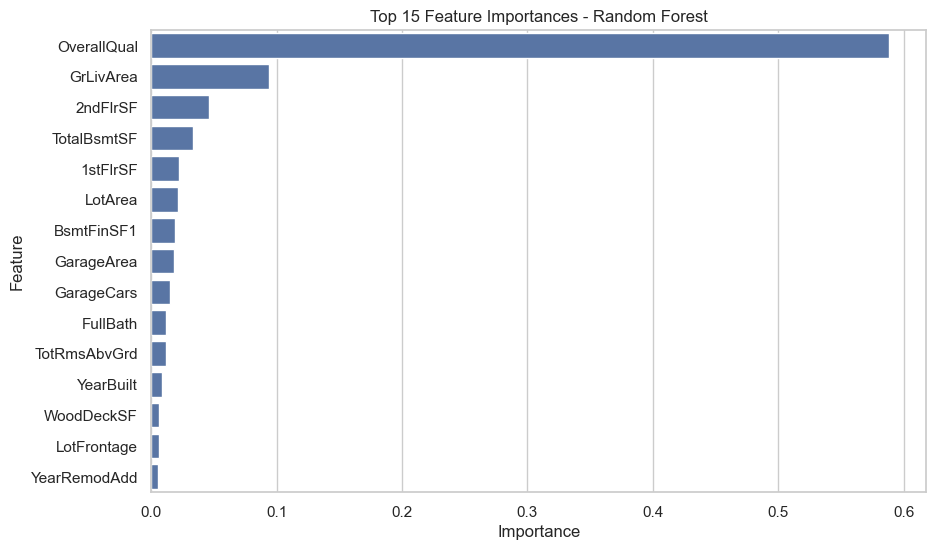

In [47]:
# Get feature importances
rf_importances = forest.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": rf_importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False).head(15)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df)
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

This plot shows which features the Random Forest considers most predictive. OverallQual, GrLivArea, and 2ndFlrSF dominate here, which aligns with intuition about housing prices.

OverallQual (Overall Material and Finish Quality): This captures the general quality of the house, including construction and materials. Naturally, higher-quality homes command higher prices, making this feature a very strong predictor.

GrLivArea (Above Ground Living Area): The total living space above ground reflects the usable size of the house. Larger living areas generally correlate with higher prices, so it makes sense that the model relies heavily on this feature.

2nd Flr SF (Second Floor Square Feet): The size of the second floor directly contributes to the total living area and overall utility of the house. Homes with more space on the second floor often offer better layouts and more bedrooms, which buyers value.

Together, these features capture both the quality and usable space of a home, which are fundamental drivers of market value. The Random Forest highlights them because they consistently explain much of the variance in SalePrice.

#### 4. Predicted vs Actual Sale Prices

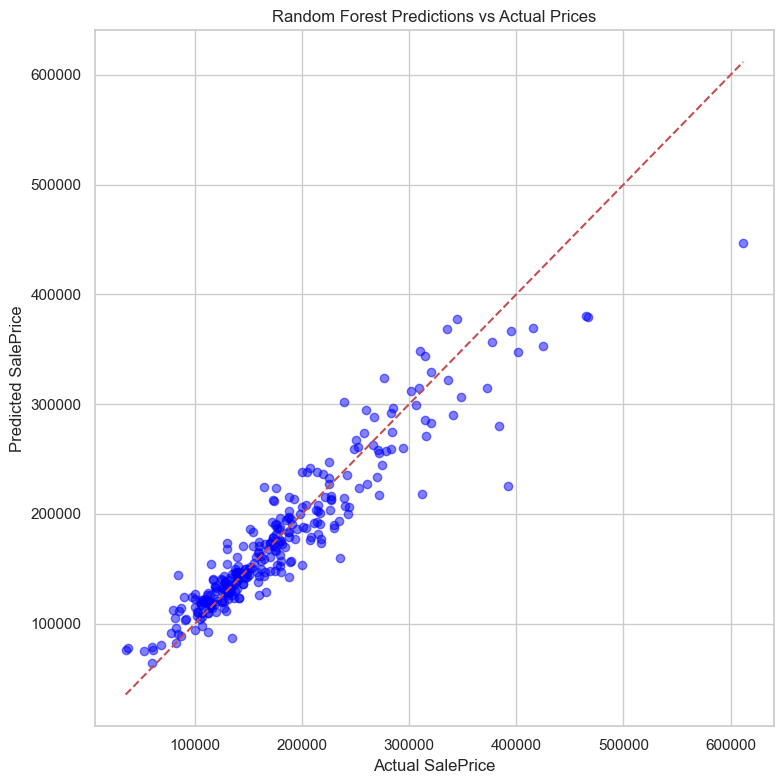

In [62]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_forest, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Random Forest Predictions vs Actual Prices')
plt.tight_layout()
plt.show()

This scatter plot compares the model’s predicted sale prices to the actual sale prices in the test set. The dashed red diagonal is the reference for "perfect predictions". Most of the points cluster closely around the diagonal. That tight clustering reflects the strong R² score of about 0.876, meaning the Random Forest captures a large share of the real variation in housing prices.

The spread for higher-priced homes hint that the model is less precise on the more expensive properties. Most likely because these homes have a rarer combination of features, so the forest has fewer similar examples to learn from. Points above the line show cases where the model underestimates price, while points below show overestimates. The important thing is that the deviations are fairly small relative to the price range, which signals stable generalization.

### Conclusion & Insights

This project explored the Ames Housing dataset through a full predictive modeling pipeline, beginning with data cleaning and exploratory analysis and moving toward increasingly expressive models. The goal was to understand which property characteristics matter most for housing prices and to evaluate how well different algorithms capture those relationships.

The linear regression model served as a baseline and performed reasonably for a dataset of this complexity, but its performance made it clear that many relationships between features and price were not strictly linear. The decision tree improved the results by introducing flexibility, though the model remained sensitive to variance and occasionally produced unstable predictions.

The Random Forest provided the strongest performance overall. With an R² of roughly 0.876 and a substantially lower prediction error, the forest model demonstrated an ability to capture both the dominant patterns and more subtle interactions between variables. The feature importance results were consistent with real-world housing economics: OverallQual, GrLivArea, and 2ndFlrSF emerged as the strongest predictors, reflecting how buyers value construction quality and usable living space.

Taken together, the analysis shows that tree-based ensemble methods can offer a reliable approach to structured tabular data, particularly when nonlinear relationships are expected. The visual diagnostics and feature rankings add transparency to the model’s behavior, turning raw predictions into interpretable insights. This combination of predictive strength and interpretability makes Random Forests a strong practical choice for price estimation tasks.